In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from prettytable import PrettyTable

In [2]:
def plot_loss(vae_loss, iwae_loss, output_file, title, save_fig=True, ylim=[80,180]):
    plt.plot(range(1,len(vae_loss)+1), vae_loss, label=f"VAE (min: {min(vae_loss):.2f})")
    plt.plot(range(1,len(iwae_loss)+1), iwae_loss, label=f"IWAE (min: {min(iwae_loss):.2f})")
    plt.title(title)
    plt.legend()
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.ylim(ylim)
    plt.grid()
    if save_fig:
        plt.savefig(output_file)
    plt.show()

## MNIST L2

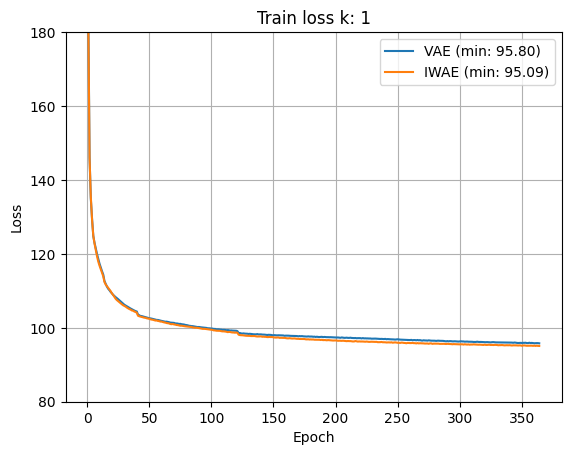

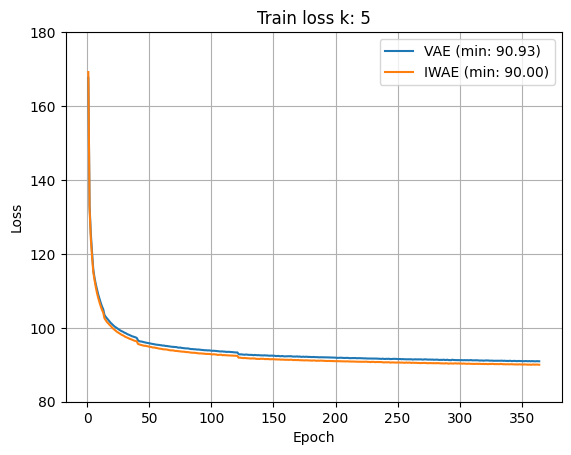

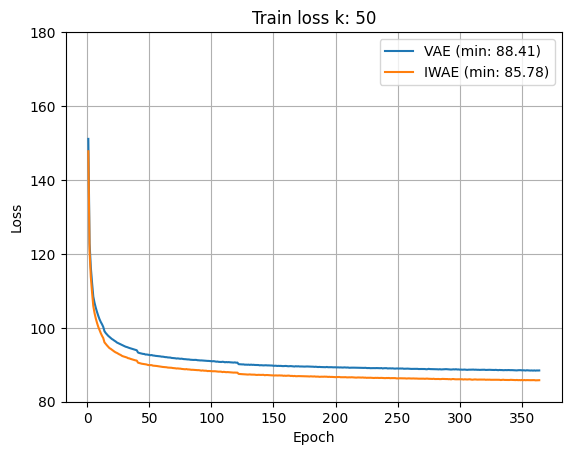

In [11]:
for k in [1,5,50]:
    vae_file = f"outputs/MNIST/Run2/L2/k{k}_vae_train_loss.pt"
    iwae_file = f"outputs/MNIST/Run2/L2/k{k}_iwae_train_loss.pt"
    title = f"Train loss k: {k}"
    output_file = f"plots/MNIST/L2/k{k}_loss.png"

    vae_loss = torch.load(vae_file).numpy()
    iwae_loss = torch.load(iwae_file).numpy()

    plot_loss(vae_loss, iwae_loss, output_file, title, save_fig=True)

In [12]:
table = PrettyTable(["k", "VAE", "IWAE"])
for k in [1,5,50]:
    vae_file = f"outputs/MNIST/Run2/L2/k{k}_vae_eval_nll.pt"
    iwae_file = f"outputs/MNIST/Run2/L2/k{k}_iwae_eval_nll.pt"

    vae_eval = torch.load(vae_file)
    iwae_eval = torch.load(iwae_file)
    table.add_row([k, f"{vae_eval:.2f}", f"{iwae_eval:.2f}"])

print(table)
with open("plots/MNIST/L2/eval_loss.txt", "w") as text_file:
    text_file.writelines(str(table))


+----+-------+-------+
| k  |  VAE  |  IWAE |
+----+-------+-------+
| 1  | 92.84 | 90.13 |
| 5  | 89.05 | 87.03 |
| 50 | 88.37 | 85.47 |
+----+-------+-------+


## Omniglot L2

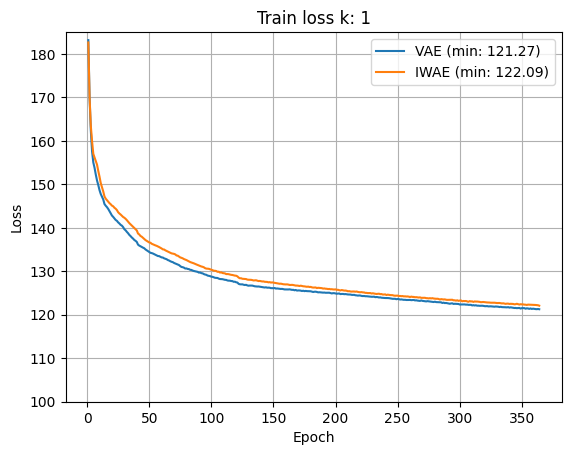

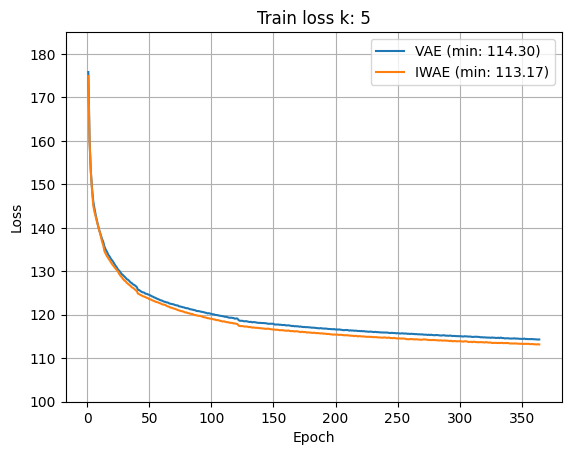

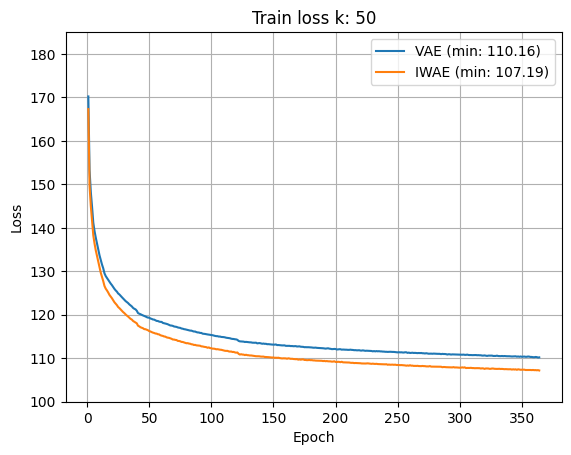

In [6]:
for k in [1,5,50]:
    vae_file = f"outputs/omniglot/Run2/L2/k{k}_vae_train_loss.pt"
    iwae_file = f"outputs/omniglot/Run2/L2/k{k}_iwae_train_loss.pt"
    title = f"Train loss k: {k}"
    output_file = f"plots/omniglot/L2/k{k}_loss.png"

    iwae_loss = torch.load(iwae_file).detach().numpy()
    vae_loss = torch.load(vae_file).detach().numpy()

    plot_loss(vae_loss, iwae_loss, output_file, title, save_fig=True, ylim=[100,185])

In [7]:
table = PrettyTable(["k", "VAE", "IWAE"])
for k in [1,5,50]:
    vae_file = f"outputs/omniglot/Run2/L2/k{k}_vae_eval_nll.pt"
    iwae_file = f"outputs/omniglot/Run2/L2/k{k}_iwae_eval_nll.pt"

    try:
        vae_eval = torch.load(vae_file)
    except:
        vae_eval = 0
    iwae_eval = torch.load(iwae_file)
    table.add_row([k, f"{vae_eval:.2f}", f"{iwae_eval:.2f}"])

print(table)
with open("plots/omniglot/L2/eval_loss.txt", "w") as text_file:
    text_file.writelines(str(table))

+----+--------+--------+
| k  |  VAE   |  IWAE  |
+----+--------+--------+
| 1  | 118.65 | 117.60 |
| 5  | 113.04 | 110.44 |
| 50 | 111.38 | 108.52 |
+----+--------+--------+
